# Titration analysis
Why are we simulating titration? What is titration in the traditional sense? What is the overall experiment we're conducting here. What's its purpose?

## Abreviated methods
What is the original salt concentration? How many zinc ions? How long was this simulation run? What were the run parameters? Replace this text with your explanation.

In [23]:
# Dependencies
from __future__ import division
import MDAnalysis as md
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import os
import subprocess 
from IPython.display import Image
%matplotlib inline 

In [2]:
# Where are VMD analysis scripts?
vmd_analysis = '/Users/melvrl13/Documents/AMD/AMD-VMD/VMDScripts/Analysis'

In [3]:
#Where is VMD?
vmd_path = os.environ["VMD_HOME"]
#What folder are you working on
cwd = os.getcwd()

In [4]:
# Input files
u = md.Universe('structure.psf','out.dcd')

In [5]:
# Selection
not_water = u.select_atoms("segid F10 or name ZN")
print not_water #check

<AtomGroup with 290 atoms>


# Strip DCD
Why do we do this? Replace this text with an explanation.

In [6]:
# Write a stripped dcd
with md.Writer("F10andZn.dcd",n_atoms=not_water.n_atoms) as dcd_out:
    for ts in u.trajectory:
        dcd_out.write(not_water)
# Write an accompanying PDB for other inputs requiring topology
not_water.write('F10andZn.pdb')

# Radial distribution
What is this and why do we do it? Replace this text with an explanation.

In [7]:
# VMD radial distribution function
vmd_rdf_script = os.path.join(vmd_analysis,'RadialDistribution.tcl')
vmd_command = (vmd_path + '/vmd_MACOSXX86 -dispdev text ' 
               + cwd + '/F10andZn.pdb ' + cwd + 
               '/F10andZn.dcd -e ' 
               + vmd_rdf_script + ' -args '
               + '-selection1 segid_F10 '
               + '-selection2 name_ZN '
               + '-delta 0.1 '
               + '-rmax 30.0 '
               + '-usepbc T '
               + '-selupdate F '
               + '-first 1 '
               + '-last -1 '
               + '-stride 1 '
               + '-outfile ' + cwd +'/rdf.dat') 
vmd_rdf = subprocess.call(vmd_command, shell=True)

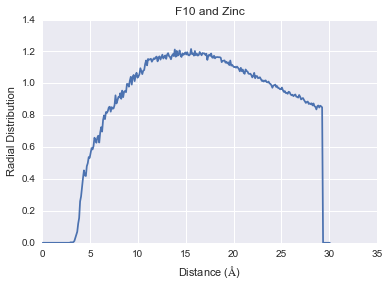

In [8]:
# Plot VMD output
rdf = np.loadtxt(cwd +'/rdf.dat')
plt.plot(rdf[:,0],rdf[:,1])
plt.xlabel('Distance ($\AA$)')
plt.ylabel('Radial Distribution')
plt.title('F10 and Zinc')
plt.savefig(cwd+'/gofR.png')

## Observations
write anyhing you notice her

## Conclusions
write anything you conclude from your observations here.

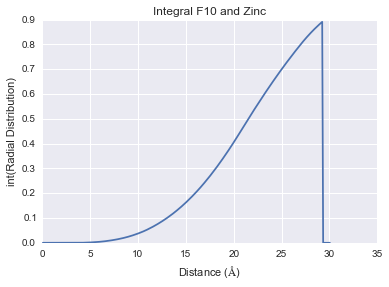

In [9]:
# And intergral thereof
plt.plot(rdf[:,0],rdf[:,2])
plt.xlabel('Distance ($\AA$)')
plt.ylabel('int(Radial Distribution)')
plt.title('Integral F10 and Zinc')
plt.savefig(cwd+'/INTgofR.png')

# Visualization
Why don't we just let the computer figure out everything. Why might we we want to visualize what's happening? Replace this text with your explanation.

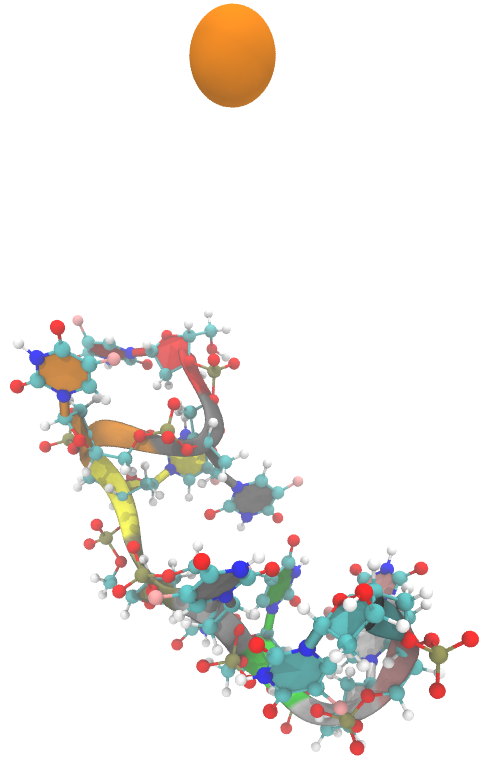

In [26]:
# Render last frame with zinc position
# Once you've rendered it as LastFrame.png, play this cell
Image(filename='LastFrame.png',width=800)

# Conclusions
Based on this titration run and the ones before it, what patterns are emerging?